##  安装DashScope python SDK

In [1]:
# install required packages
!pip install dashscope

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## 利用LLM来产生具备更加丰富细节的文生图prompt

In [2]:
import dashscope
import textwrap
from dashscope import Generation

LLM_model = 'qwen-7b-chat-v1'
# [Note: get your DashScope API key here first: https://dashscope.console.aliyun.com/apiKey]
dashscope.api_key='YOUR-DASHSCOPE-API-KEY'

simple_prompt = '星际间的宇宙飞船，神秘感，末日风格'

instruction = f'''generate an english detailed prompt to be used for text to image image generation. the original prompt is in```
	```
        {simple_prompt}
	```
    please return prompt only, nothing else.
    '''

response = Generation.call(
    model = LLM_model,
    prompt = instruction

)

text2image_prompt = response.output['text']
print(textwrap.fill(text2image_prompt, width=80))


"Create an image of a sleek, futuristic spaceship floating amidst the vast
expanse of a desolate, post-apocalyptic universe. The ship should have a sleek,
minimalist design with sharp lines and metallic finishes. It should convey a
sense of mystery and intrigue, with subtle details hinting at its advanced
technology and potential capabilities. The background should be a desolate,
barren wasteland with craters, debris, and ruins scattered throughout. The mood
should be tense and ominous, with a sense of danger lurking just beyond the
horizon. The image should be rendered in a dark, moody style with deep shadows
and bold colors to emphasize the contrast between the sleek ship and the harsh,
unforgiving environment it inhabit."


## 使用增强后的prompt产生图片

In [3]:
from dashscope import ImageSynthesis

text2image_model = "stable-diffusion-v1.5"

response = ImageSynthesis.call(model = text2image_model,
                            prompt = text2image_prompt)

## 生成返回的图片存储和展示

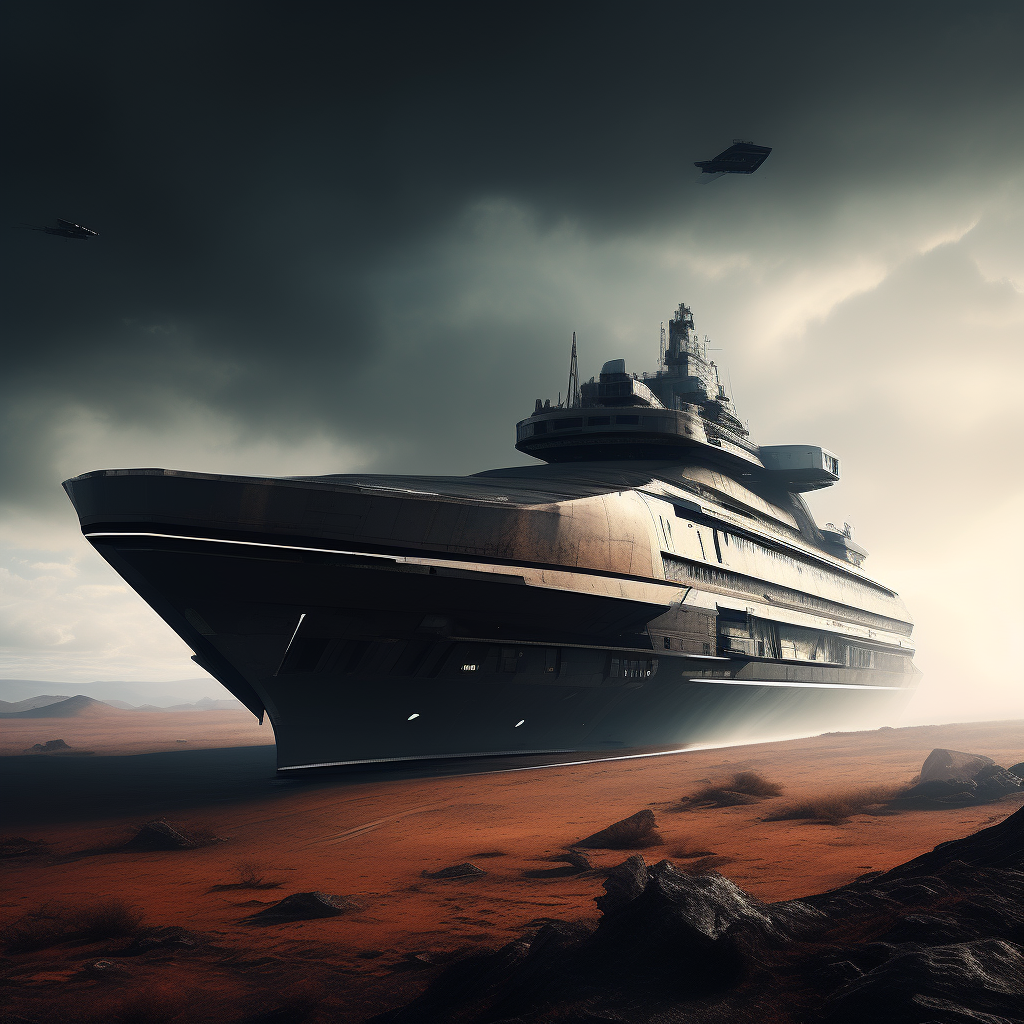

In [4]:
import requests
from PIL import Image

url = response.output.results[0]['url']
data = requests.get(url).content
img_file = 'img.jpg'
with open(img_file,'wb') as f:
    f.write(data)

img = Image.open(img_file)
img.show()
